In [1]:
import sys
import os
sys.path.insert(0, "../../python")

from beam.beams import laserpulse
from beam.beams import laserbeam
from beam.elements import plasma
from beam.elements import optic
from beam import interactions
from ionization import ionization
import numpy as np
import matplotlib.pyplot as plt

path = '/media/robert/Data_Storage/Data/Plots/Calendar/'

In [2]:
pulseParams = {'Nx' : 2**12,
               'Ny' : 2**11,
               'Nt' : 2**6,
               'X' : 8e3,
               'Y' : 8e3,
               'T' : 300,
               'lam' : 0.8,
               'path' : path,
               'name' : 'GaussianPulse',
               'threads' : 4,
               'cyl' : True,
               'E0' : 6,
               'waist' : 2e3,
               'z0' : 0.0,
               'tau' : 100}

#beam = laserbeam.GaussianLaser(pulseParams)
#pulse = laserpulse.GaussianPulse(pulseParams)

axiconParams = {'Nx' : pulseParams['Nx'],
                'Ny' : pulseParams['Ny'],
                'X' : pulseParams['X'],
                'Y' : pulseParams['Y'],
                'path' : path,
                'name' : 'Axicon',
                'lam' : pulseParams['lam'],
                'beta' : 0.2}

#axicon = optic.AxiconLens(axiconParams)

plasmaParams = {'Nx' : pulseParams['Nx'],
                'Ny' : pulseParams['Ny'],
                'Nz' : 2**12,
                'X' : pulseParams['X'],
                'Y' : pulseParams['Y'],
                'Z' : 1e6,
                'n0': 1.0,
                'atom' : {'EI': 13.5984,
                          'Z': 1,
                          'l': 0,
                          'm': 0,
                          'alpha': 0.667},
                'path' : path,
                'name' : 'Plasma',
                'cyl' : True}

#argon = plasma.UniformPlasma(plasmaParams)

In [3]:
#interactions.beam_phase(beam, axicon)
#beam.propagate(np.linspace(0, plasmaParams['Z'], plasmaParams['Nz']), 1.0)
#beam.plot_intensity_at(1)
#beam.plot_intensity_at(128)
#beam.plot_intensity_at(255)

In [4]:
#interactions.beam_phase(pulse, axicon)
#interactions.pulse_plasma(pulse, argon)

In [5]:
#argon.plot_long_density_center()

In [6]:
ind = 64
#pulse.plot_tran_intensity_at(ind)
#pulse.plot_long_intensity_at(ind)

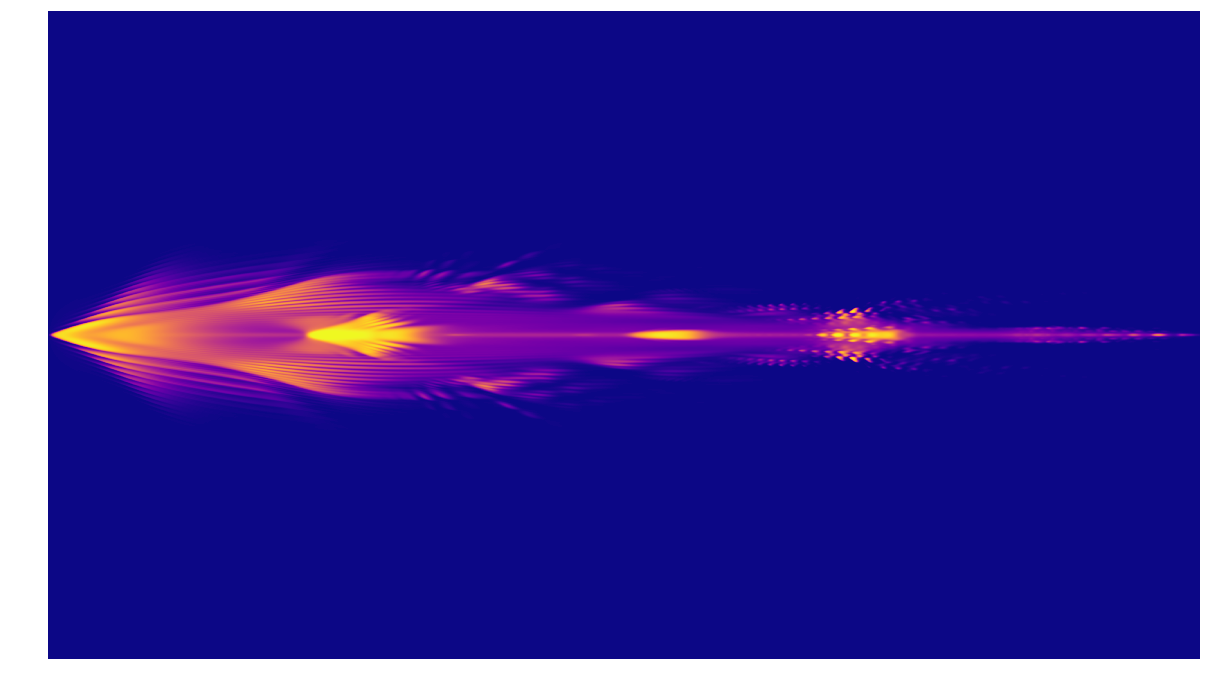

In [7]:
Nz = plasmaParams['Nz']
Z = plasmaParams['Z']
X = plasmaParams['X']
ne = np.zeros((Nz, plasmaParams['Nx']))
dirName = dirName = path + 'elements/element_' + plasmaParams['name'] + '/'
filePre = dirName + plasmaParams['name']
for i in range(1, Nz):
    ne[i, :] = np.load(filePre + '_plasmaDensity_' + str(i) + '.npy')
ne = np.flipud(np.transpose(ne))
fig = plt.figure(figsize=(16, 9), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
im = ax.imshow(ne, aspect='auto', extent=[0, Z, -X/2, X/2], cmap='plasma')
plt.savefig('calendarDen.png', dpi=256)
plt.show()